cpu
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.51e+00 | test_loss: 2.29e+00 | reg: 5.94e+01 | : 100%|█| 300/300 [01:08<00:00,  4.36


saving model version 0.1
MSE: 5.2426
RMSE: 2.2897
MAE: 1.0723
MAPE: 2.7959
R²: 0.9972
fixing (0,0,0) with sin, r2=0.9999988079071045, c=2
fixing (0,0,1) with x^0.5, r2=0.9998210072517395, c=2
fixing (0,0,2) with cos, r2=0.999987006187439, c=2
fixing (0,1,0) with exp, r2=0.9989357590675354, c=2
fixing (0,1,1) with 0, r2=0.0, c=0
fixing (0,1,2) with x, r2=1.000000238418579, c=1
fixing (0,2,0) with 0, r2=0.0, c=0
fixing (0,2,1) with 0, r2=0.0, c=0
fixing (0,2,2) with 0, r2=0.0, c=0
fixing (0,3,0) with 0, r2=0.0, c=0
fixing (0,3,1) with x, r2=0.9473995566368103, c=1
fixing (0,3,2) with cos, r2=0.9998044967651367, c=2
fixing (0,4,0) with 0, r2=0.0, c=0
fixing (0,4,1) with 0, r2=0.0, c=0
fixing (0,4,2) with x, r2=0.9999985694885254, c=1
fixing (0,5,0) with 0, r2=0.0, c=0
fixing (0,5,1) with x, r2=0.9806784987449646, c=1
fixing (0,5,2) with x, r2=0.9992677569389343, c=1
fixing (1,0,0) with 0, r2=0.0, c=0
fixing (1,0,1) with 0, r2=0.0, c=0
fixing (1,1,0) with x, r2=0.9863981604576111, c=1
fixi

2.267*x_4 + 0.639*x_6 + 88.897*sqrt(x_1 + 0.23) - 28.031

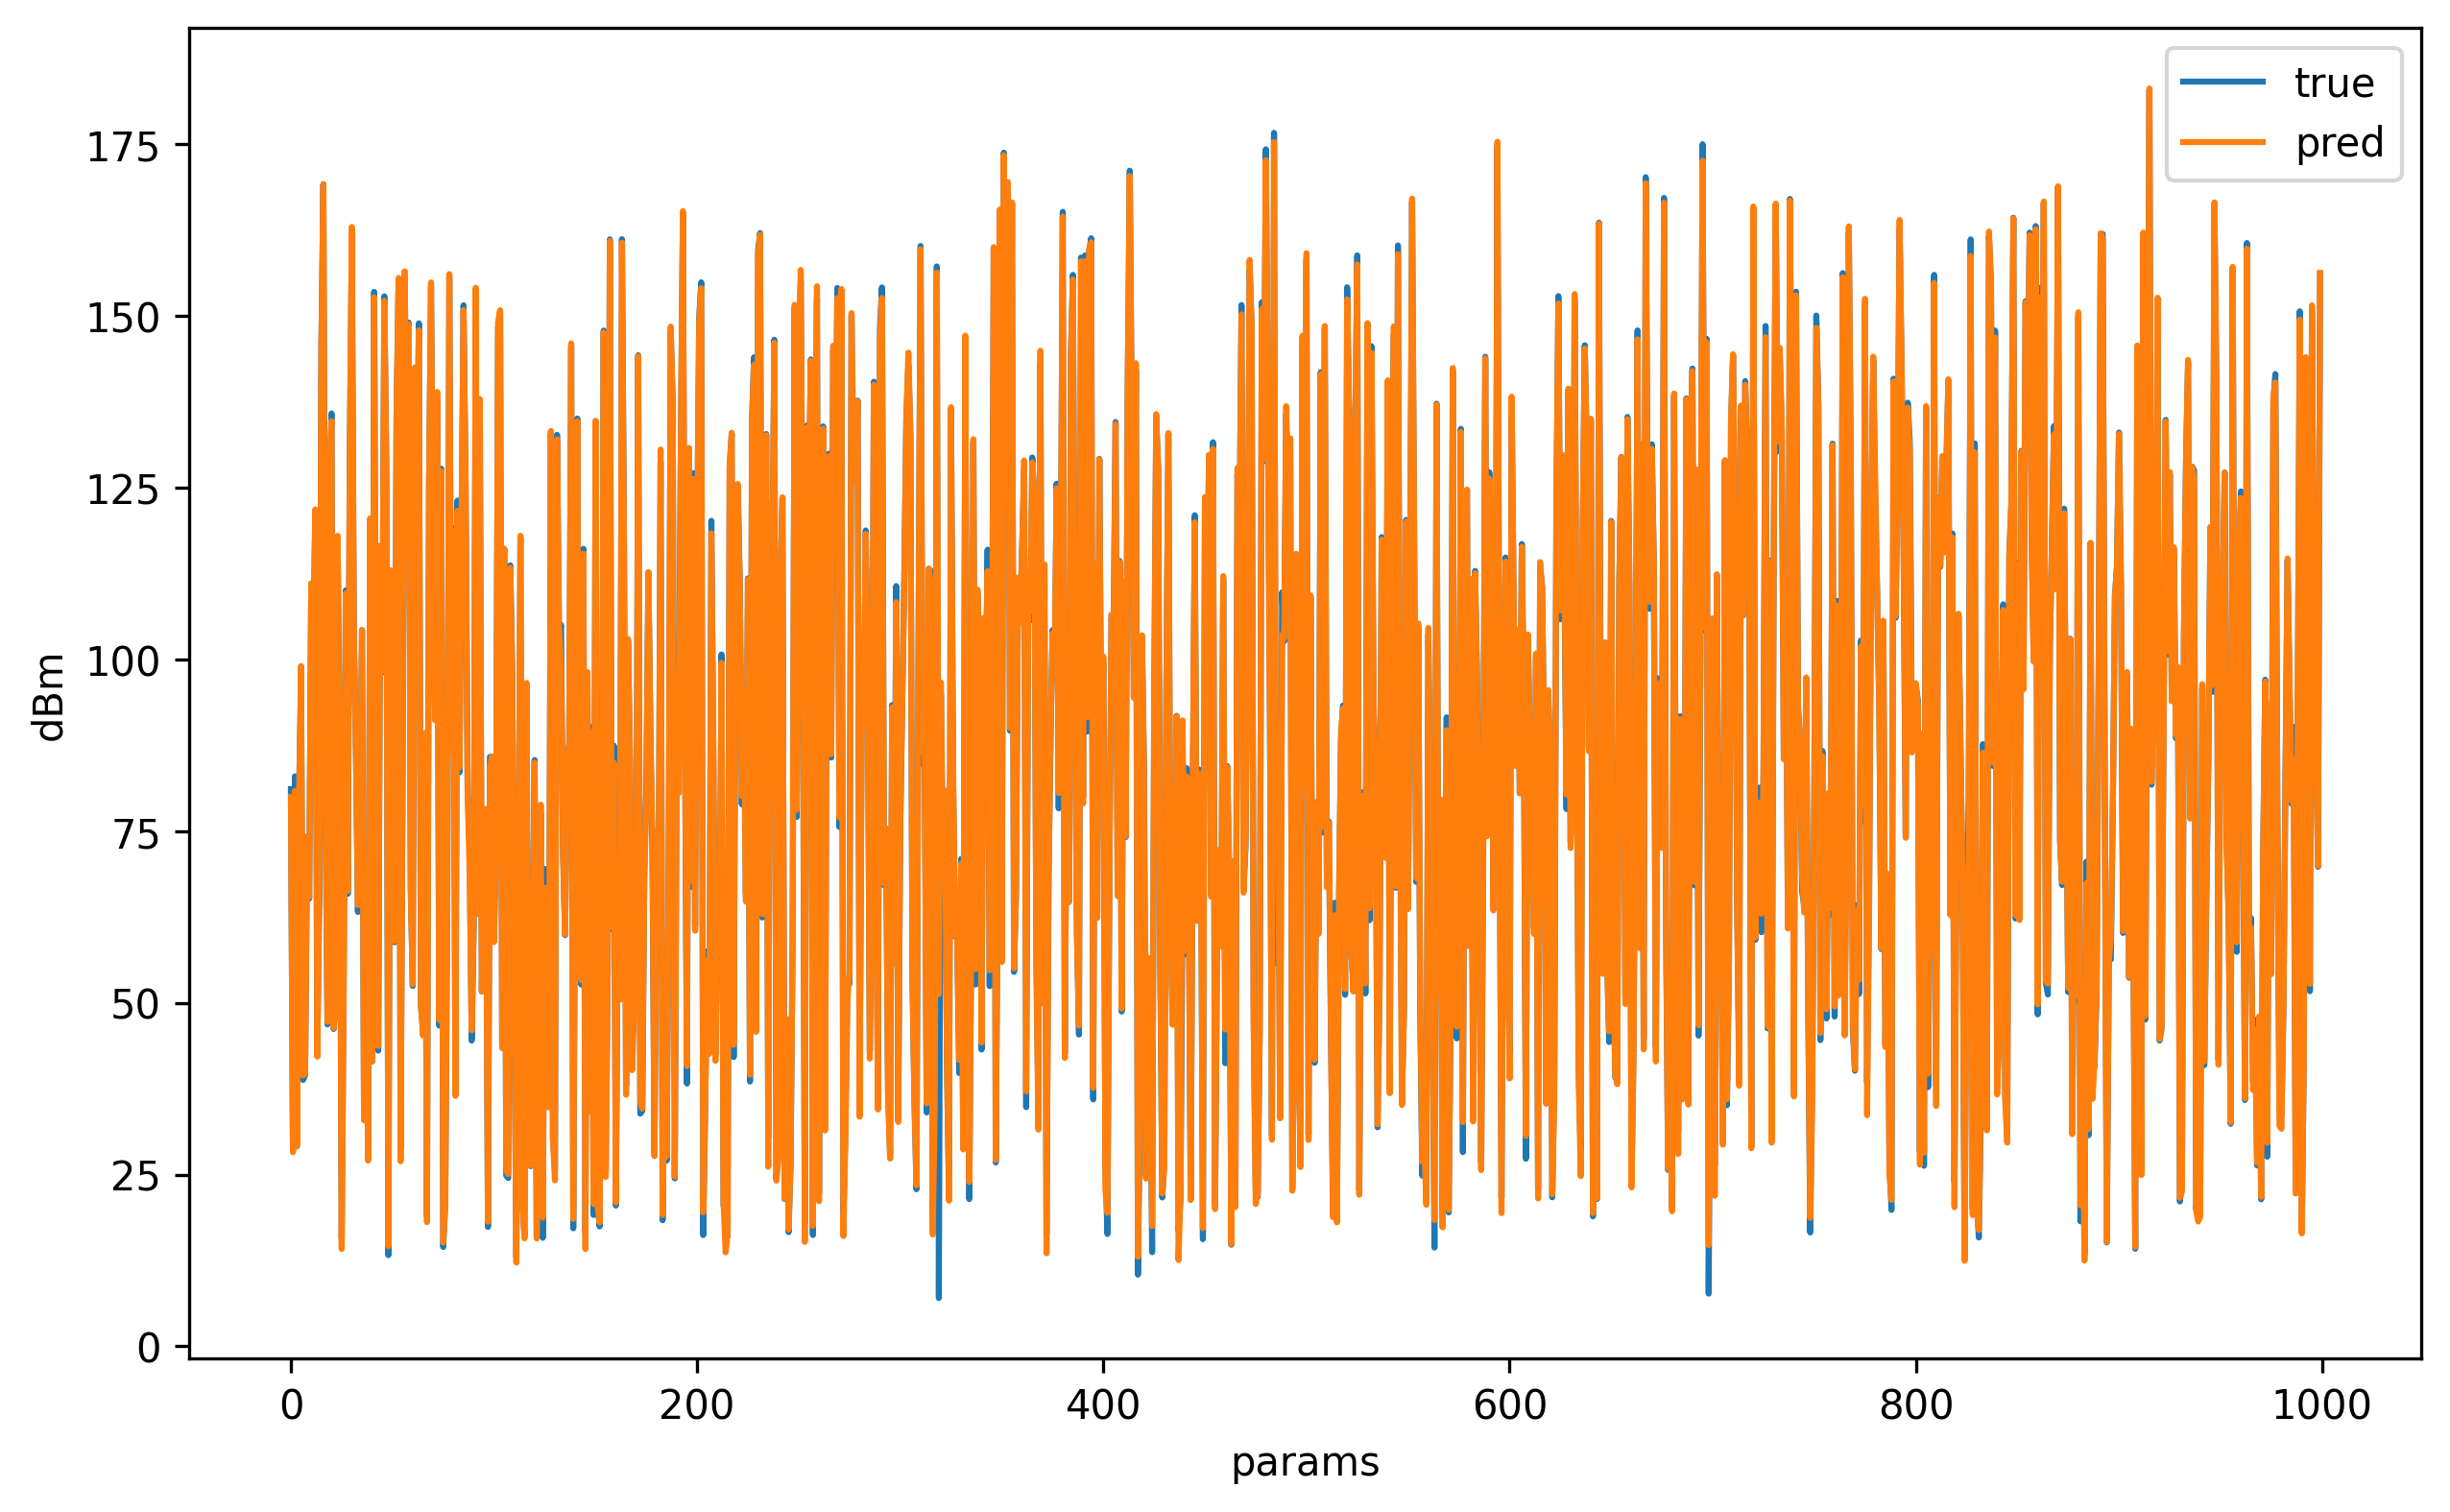

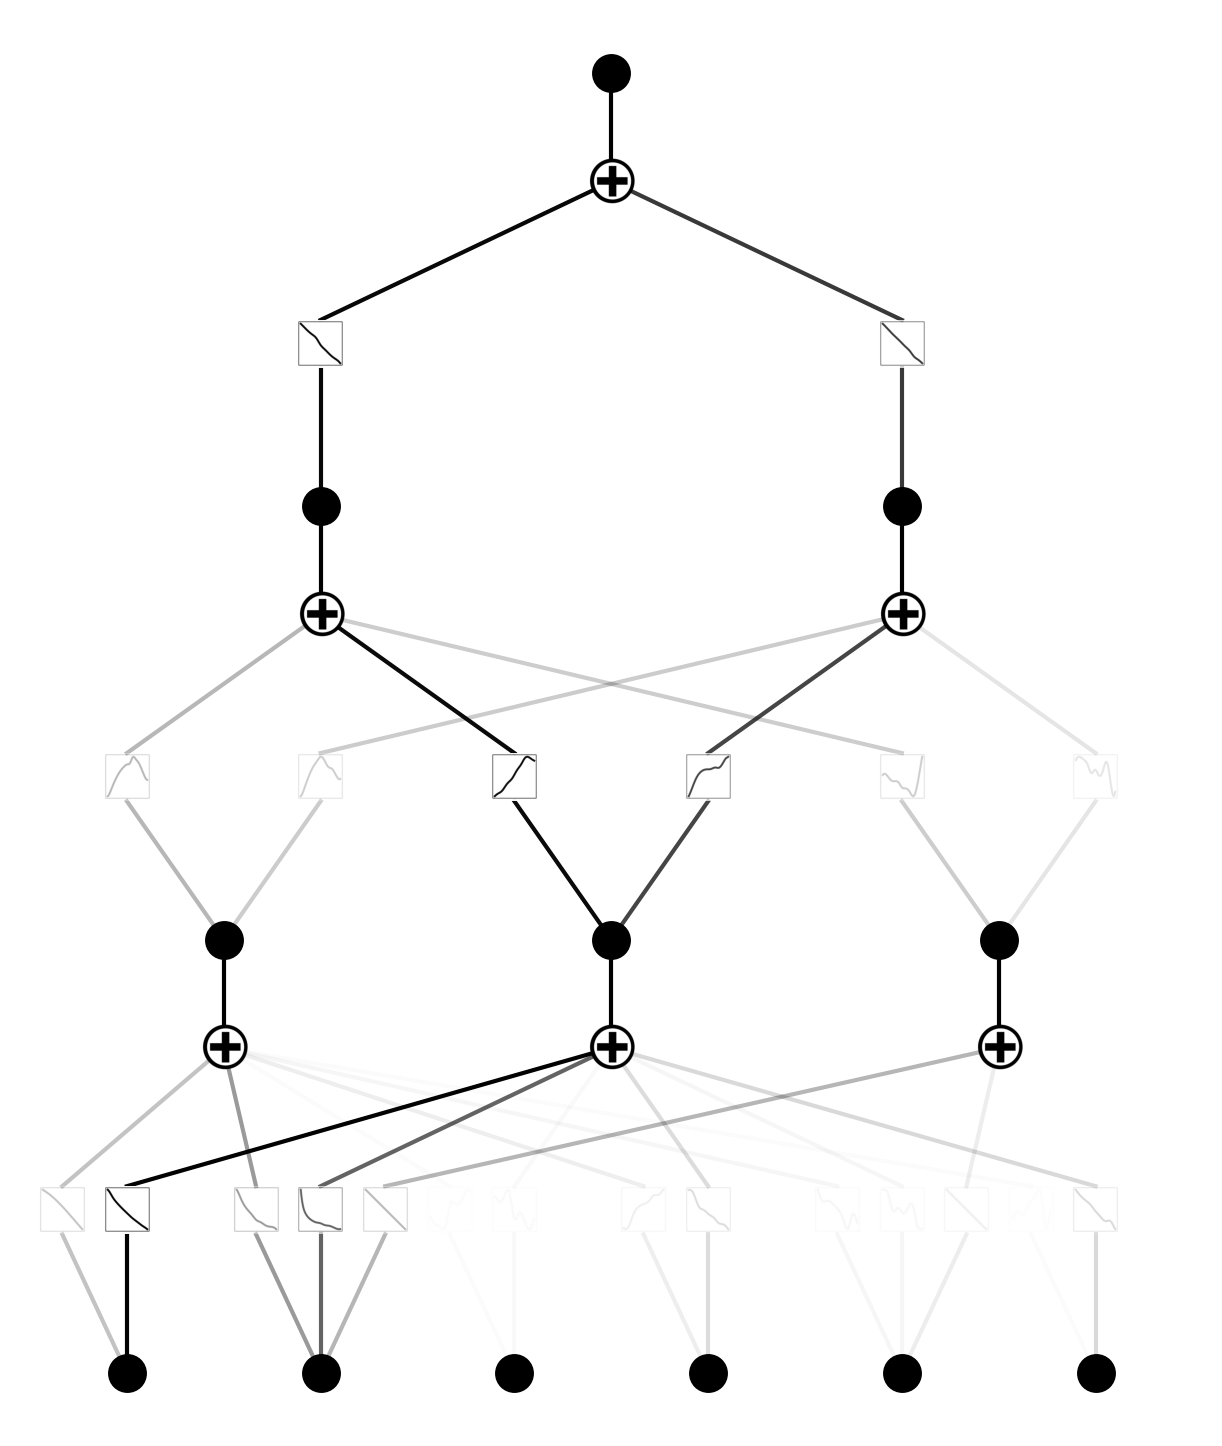

In [ ]:

from kan import *
import torch

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['figure.dpi'] = 300

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)


def eval_kan(model_kan, test_data):
    y_true = test_data['test_label']
    with torch.no_grad():
        y_pred = model_kan(test_data['test_input'])
        
    y_true = y_true.detach().cpu().numpy().ravel()
    y_pred = y_pred.detach().cpu().numpy().ravel()
    time = range(len(y_true))

    # Plot the training and test losses.
    plt.plot(time, y_true)
    plt.plot(time, y_pred)
    plt.legend(['true', 'pred'])
    plt.ylabel('dB')
    plt.xlabel('params')


    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)

    mape_frac = mean_absolute_percentage_error(y_true, y_pred)
    mape = mape_frac * 100
    
    # Print results
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MAPE: {mape:.4f}")
    print(f"R²: {r2:.4f}")

    return mse, rmse, mae, mape, r2

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_gids_steps_lambda_loss(gids_size, steps, lam, metric, metric_name):
    """
    Plots a 3D scatter of gids_size vs steps vs train_loss, 
    with point color representing lambda.
    
    Parameters:
    - gids_size: array-like of shape (N,)
    - steps: array-like of shape (N,)
    - lam: array-like of shape (N,)
    - train_loss: array-like of shape (N,)
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(gids_size, steps, lam, c=metric)
    
    ax.set_xlabel('gids size')
    ax.set_ylabel('steps')
    ax.set_zlabel('lambda')
    
    plt.colorbar(sc, label='metric')
    plt.title('3D Scatter: gids size vs steps vs lambda (' + metric_name + ' as color)')
    plt.show()


f = lambda x: 10 * x[:,[0]] * torch.log(2 * (x[:,[1]]) + x[:,[2]] + 10 * x[:,[3]] * torch.log(x[:,[4]])) + x[:,[5]]
dataset = create_dataset(f, 
                         n_var=6, 
                         ranges=[(0.1, 2.5), (1, 500), (-10,-1), (0,2), (2,73), (4,12)], 
                         #train_num=5000,
                         device=device)

model = KAN(width=[6,3,2,1], grid=8, k=3, seed=42, device=device)

model.fit(dataset, opt="LBFGS", steps=300, lamb=0.000002, lamb_entropy=2.);

eval_kan(model, dataset)
model.plot()

#lib = ['x', 'log', 'exp', 'sqrt', 'abs']
model.auto_symbolic()

ex_round(model.symbolic_formula()[0][0], 3)



In [4]:

model.fit(dataset, opt="LBFGS", steps=300, lamb=0.002, lamb_entropy=2.);
eval_kan(model, dataset)

formula = model.symbolic_formula()[0][0]
nsimplify(ex_round(formula, 4))

| train_loss: nan | test_loss: nan | reg: nan | :   5%|▌           | 15/300 [00:04<01:17,  3.67it/s]


KeyboardInterrupt: 

checkpoint directory created: ./model
saving model version 0.0
Grid size: 5, steps 50, 0.002


| train_loss: 3.62e+00 | test_loss: 4.10e+00 | reg: 3.14e+02 | : 100%|█| 50/50 [00:09<00:00,  5.42it


saving model version 0.1
MSE: 16.8287
RMSE: 4.1023
MAE: 2.2452
MAPE: 5.4633
R²: 0.9911
[np.float64(0.002)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 5, steps 50, 0.0002


| train_loss: 3.98e+01 | test_loss: 4.03e+01 | reg: 6.14e+03 | : 100%|█| 50/50 [00:04<00:00, 10.09it


saving model version 0.1
MSE: 1625.0139
RMSE: 40.3115
MAE: 33.8036
MAPE: 67.2806
R²: 0.1392
[np.float64(0.002), np.float64(0.0002)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 5, steps 50, 2e-05


| train_loss: 1.60e+01 | test_loss: 1.56e+01 | reg: 1.77e+04 | : 100%|█| 50/50 [00:04<00:00, 11.09it


saving model version 0.1
MSE: 244.5624
RMSE: 15.6385
MAE: 11.9563
MAPE: 23.0453
R²: 0.8705
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 5, steps 100, 0.002


| train_loss: 3.07e+00 | test_loss: 3.68e+00 | reg: 3.02e+02 | : 100%|█| 100/100 [00:15<00:00,  6.48


saving model version 0.1
MSE: 13.5686
RMSE: 3.6836
MAE: 1.8518
MAPE: 4.8813
R²: 0.9928
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 5, steps 100, 0.0002


| train_loss: 3.72e+01 | test_loss: 3.75e+01 | reg: 1.66e+04 | : 100%|█| 100/100 [00:08<00:00, 12.13


saving model version 0.1
MSE: 1404.5243
RMSE: 37.4770
MAE: 30.4979
MAPE: 58.3165
R²: 0.2560
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 5, steps 100, 2e-05


| train_loss: 1.60e+01 | test_loss: 1.56e+01 | reg: 1.77e+04 | : 100%|█| 100/100 [00:06<00:00, 14.89


saving model version 0.1
MSE: 244.5616
RMSE: 15.6385
MAE: 11.9563
MAPE: 23.0452
R²: 0.8705
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 5, steps 200, 0.002


| train_loss: 2.86e+00 | test_loss: 3.45e+00 | reg: 2.91e+02 | : 100%|█| 200/200 [00:23<00:00,  8.66


saving model version 0.1
MSE: 11.8875
RMSE: 3.4478
MAE: 1.7247
MAPE: 4.5083
R²: 0.9937
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 5, steps 200, 0.0002


| train_loss: 3.72e+01 | test_loss: 3.75e+01 | reg: 1.66e+04 | : 100%|█| 200/200 [00:13<00:00, 14.39


saving model version 0.1
MSE: 1404.5248
RMSE: 37.4770
MAE: 30.4979
MAPE: 58.3166
R²: 0.2560
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 5, steps 200, 2e-05


| train_loss: 1.60e+01 | test_loss: 1.56e+01 | reg: 1.77e+04 | : 100%|█| 200/200 [00:13<00:00, 14.96


saving model version 0.1
MSE: 244.5620
RMSE: 15.6385
MAE: 11.9564
MAPE: 23.0453
R²: 0.8705
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 5, steps 300, 0.002


| train_loss: 2.69e+00 | test_loss: 3.41e+00 | reg: 2.84e+02 | : 100%|█| 300/300 [00:29<00:00, 10.17


saving model version 0.1
MSE: 11.6193
RMSE: 3.4087
MAE: 1.6720
MAPE: 4.2123
R²: 0.9938
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 5, steps 300, 0.0002


| train_loss: 3.72e+01 | test_loss: 3.75e+01 | reg: 1.66e+04 | : 100%|█| 300/300 [00:19<00:00, 15.79


saving model version 0.1
MSE: 1404.5240
RMSE: 37.4770
MAE: 30.4979
MAPE: 58.3165
R²: 0.2560
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 5, steps 300, 2e-05


| train_loss: 1.60e+01 | test_loss: 1.56e+01 | reg: 1.77e+04 | : 100%|█| 300/300 [00:17<00:00, 17.04


saving model version 0.1
MSE: 244.5616
RMSE: 15.6385
MAE: 11.9563
MAPE: 23.0452
R²: 0.8705
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 8, steps 50, 0.002


| train_loss: 3.67e+00 | test_loss: 4.55e+00 | reg: 4.42e+01 | : 100%|█| 50/50 [00:09<00:00,  5.46it


saving model version 0.1
MSE: 20.6848
RMSE: 4.5481
MAE: 2.5046
MAPE: 5.6949
R²: 0.9890
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 8, steps 50, 0.0002


| train_loss: 2.94e+00 | test_loss: 3.82e+00 | reg: 5.43e+01 | : 100%|█| 50/50 [00:09<00:00,  5.47it


saving model version 0.1
MSE: 14.6098
RMSE: 3.8223
MAE: 1.9623
MAPE: 5.2637
R²: 0.9923
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 8, steps 50, 2e-05


| train_loss: 2.74e+00 | test_loss: 3.45e+00 | reg: 5.18e+01 | : 100%|█| 50/50 [00:08<00:00,  5.77it


saving model version 0.1
MSE: 11.8732
RMSE: 3.4458
MAE: 1.6991
MAPE: 4.6271
R²: 0.9937
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 8, steps 100, 0.002


| train_loss: 2.31e+00 | test_loss: 4.03e+00 | reg: 4.23e+01 | : 100%|█| 100/100 [00:18<00:00,  5.41


saving model version 0.1
MSE: 16.2699
RMSE: 4.0336
MAE: 1.5683
MAPE: 4.4230
R²: 0.9914
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 8, steps 100, 0.0002


| train_loss: 2.16e+00 | test_loss: 3.04e+00 | reg: 5.35e+01 | : 100%|█| 100/100 [00:17<00:00,  5.73


saving model version 0.1
MSE: 9.2553
RMSE: 3.0423
MAE: 1.4441
MAPE: 3.6548
R²: 0.9951
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 8, steps 100, 2e-05


| train_loss: 2.07e+00 | test_loss: 2.70e+00 | reg: 5.15e+01 | : 100%|█| 100/100 [00:17<00:00,  5.82


saving model version 0.1
MSE: 7.2719
RMSE: 2.6966
MAE: 1.2702
MAPE: 3.5671
R²: 0.9961
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 8, steps 200, 0.002


| train_loss: 1.57e+00 | test_loss: 3.24e+00 | reg: 4.58e+01 | : 100%|█| 200/200 [05:17<00:00,  1.59


saving model version 0.1
MSE: 10.5135
RMSE: 3.2425
MAE: 1.1760
MAPE: 3.5903
R²: 0.9944
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 8, steps 200, 0.0002


| train_loss: 1.86e+00 | test_loss: 2.66e+00 | reg: 5.41e+01 | : 100%|█| 200/200 [00:34<00:00,  5.80


saving model version 0.1
MSE: 7.0972
RMSE: 2.6641
MAE: 1.2653
MAPE: 3.1554
R²: 0.9962
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 8, steps 200, 2e-05


| train_loss: 1.65e+00 | test_loss: 2.52e+00 | reg: 5.20e+01 | : 100%|█| 200/200 [10:31<00:00,  3.16


saving model version 0.1
MSE: 6.3577
RMSE: 2.5214
MAE: 1.1658
MAPE: 3.2290
R²: 0.9966
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 8, steps 300, 0.002


| train_loss: 1.22e+00 | test_loss: 2.99e+00 | reg: 4.70e+01 | : 100%|█| 300/300 [03:46<00:00,  1.33


saving model version 0.1
MSE: 8.9626
RMSE: 2.9938
MAE: 0.9219
MAPE: 3.0213
R²: 0.9953
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 8, steps 300, 0.0002


| train_loss: 1.80e+00 | test_loss: 2.66e+00 | reg: 5.37e+01 | : 100%|█| 300/300 [05:46<00:00,  1.15


saving model version 0.1
MSE: 7.0891
RMSE: 2.6625
MAE: 1.2310
MAPE: 3.0999
R²: 0.9962
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 8, steps 300, 2e-05


| train_loss: 1.42e+00 | test_loss: 2.24e+00 | reg: 5.24e+01 | : 100%|█| 300/300 [01:16<00:00,  3.92


saving model version 0.1
MSE: 4.9967
RMSE: 2.2353
MAE: 1.0963
MAPE: 2.8608
R²: 0.9974
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 10, steps 50, 0.002


| train_loss: 3.31e+01 | test_loss: 3.42e+01 | reg: 7.36e+03 | : 100%|█| 50/50 [00:05<00:00,  9.13it


saving model version 0.1
MSE: 1169.9630
RMSE: 34.2047
MAE: 27.9872
MAPE: 58.6193
R²: 0.3803
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 10, steps 50, 0.0002


| train_loss: 5.58e+00 | test_loss: 6.29e+00 | reg: 4.04e+01 | : 100%|█| 50/50 [00:08<00:00,  5.83it


saving model version 0.1
MSE: 39.5486
RMSE: 6.2888
MAE: 3.9462
MAPE: 9.8596
R²: 0.9791
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 10, steps 50, 2e-05


| train_loss: 5.66e+00 | test_loss: 6.38e+00 | reg: 6.11e+01 | : 100%|█| 50/50 [00:07<00:00,  6.95it


saving model version 0.1
MSE: 40.7391
RMSE: 6.3827
MAE: 4.0539
MAPE: 9.9647
R²: 0.9784
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 10, steps 100, 0.002


| train_loss: 1.60e+01 | test_loss: 1.55e+01 | reg: 4.39e+04 | : 100%|█| 100/100 [01:10<00:00,  1.42


saving model version 0.1
MSE: 240.7132
RMSE: 15.5149
MAE: 12.0508
MAPE: 23.1249
R²: 0.8725
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 10, steps 100, 0.0002


| train_loss: 5.58e+00 | test_loss: 6.29e+00 | reg: 4.04e+01 | : 100%|█| 100/100 [00:12<00:00,  7.98


saving model version 0.1
MSE: 39.5486
RMSE: 6.2888
MAE: 3.9462
MAPE: 9.8596
R²: 0.9791
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 10, steps 100, 2e-05


| train_loss: 5.66e+00 | test_loss: 6.38e+00 | reg: 6.11e+01 | : 100%|█| 100/100 [00:10<00:00,  9.85


saving model version 0.1
MSE: 40.7410
RMSE: 6.3829
MAE: 4.0537
MAPE: 9.9644
R²: 0.9784
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 10, steps 200, 0.002


| train_loss: 1.60e+01 | test_loss: 1.55e+01 | reg: 4.39e+04 | : 100%|█| 200/200 [00:15<00:00, 13.26


saving model version 0.1
MSE: 240.7132
RMSE: 15.5149
MAE: 12.0508
MAPE: 23.1249
R²: 0.8725
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 10, steps 200, 0.0002


| train_loss: 5.58e+00 | test_loss: 6.29e+00 | reg: 4.04e+01 | : 100%|█| 200/200 [15:59<00:00,  4.80


saving model version 0.1
MSE: 39.5487
RMSE: 6.2888
MAE: 3.9462
MAPE: 9.8596
R²: 0.9791
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 10, steps 200, 2e-05


| train_loss: 5.66e+00 | test_loss: 6.38e+00 | reg: 6.11e+01 | : 100%|█| 200/200 [00:14<00:00, 13.36


saving model version 0.1
MSE: 40.7410
RMSE: 6.3829
MAE: 4.0537
MAPE: 9.9644
R²: 0.9784
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 10, steps 300, 0.002


| train_loss: 1.60e+01 | test_loss: 1.55e+01 | reg: 4.39e+04 | : 100%|█| 300/300 [00:21<00:00, 13.99


saving model version 0.1
MSE: 240.7132
RMSE: 15.5149
MAE: 12.0508
MAPE: 23.1249
R²: 0.8725
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 10, steps 300, 0.0002


| train_loss: 5.58e+00 | test_loss: 6.29e+00 | reg: 4.04e+01 | : 100%|█| 300/300 [00:21<00:00, 13.78


saving model version 0.1
MSE: 39.5487
RMSE: 6.2888
MAE: 3.9462
MAPE: 9.8596
R²: 0.9791
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 10, steps 300, 2e-05


| train_loss: 5.66e+00 | test_loss: 6.38e+00 | reg: 6.11e+01 | : 100%|█| 300/300 [06:43<00:00,  1.34


saving model version 0.1
MSE: 40.7410
RMSE: 6.3829
MAE: 4.0537
MAPE: 9.9644
R²: 0.9784
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 15, steps 50, 0.002


| train_loss: 3.95e+01 | test_loss: 4.00e+01 | reg: 2.02e+02 | : 100%|█| 50/50 [00:08<00:00,  5.78it


saving model version 0.1
MSE: 1596.9082
RMSE: 39.9613
MAE: 33.7402
MAPE: 69.2215
R²: 0.1541
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 15, steps 50, 0.0002


| train_loss: 4.03e+01 | test_loss: 4.23e+01 | reg: 1.71e+02 | : 100%|█| 50/50 [00:08<00:00,  5.80it


saving model version 0.1
MSE: 1792.8383
RMSE: 42.3419
MAE: 34.2061
MAPE: 69.6284
R²: 0.0503
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 15, steps 50, 2e-05


| train_loss: 3.68e+01 | test_loss: 3.74e+01 | reg: 2.35e+02 | : 100%|█| 50/50 [00:08<00:00,  5.89it


saving model version 0.1
MSE: 1397.1530
RMSE: 37.3785
MAE: 29.6550
MAPE: 58.3606
R²: 0.2599
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 15, steps 100, 0.002


| train_loss: 3.86e+01 | test_loss: 3.92e+01 | reg: 2.05e+02 | : 100%|█| 100/100 [00:16<00:00,  6.05


saving model version 0.1
MSE: 1535.2517
RMSE: 39.1823
MAE: 32.9332
MAPE: 68.3937
R²: 0.1868
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 15, steps 100, 0.0002


| train_loss: 3.81e+01 | test_loss: 3.90e+01 | reg: 2.10e+02 | : 100%|█| 100/100 [12:58<00:00,  7.79


saving model version 0.1
MSE: 1524.0532
RMSE: 39.0391
MAE: 32.2221
MAPE: 65.7420
R²: 0.1927
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 15, steps 100, 2e-05


| train_loss: 3.41e+01 | test_loss: 3.46e+01 | reg: 2.70e+02 | : 100%|█| 100/100 [00:18<00:00,  5.46


saving model version 0.1
MSE: 1199.7239
RMSE: 34.6370
MAE: 26.9477
MAPE: 54.9127
R²: 0.3645
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 15, steps 200, 0.002


| train_loss: 3.57e+01 | test_loss: 3.87e+01 | reg: 2.29e+02 | : 100%|█| 200/200 [00:33<00:00,  6.02


saving model version 0.1
MSE: 1494.8168
RMSE: 38.6629
MAE: 30.2828
MAPE: 62.8177
R²: 0.2082
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 15

| train_loss: 2.66e+01 | test_loss: 3.05e+01 | reg: 3.06e+02 | : 100%|█| 200/200 [02:05<00:00,  1.59


saving model version 0.1
MSE: 930.9711
RMSE: 30.5118
MAE: 22.5925
MAPE: 47.5658
R²: 0.5069
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002)]
checkpoint directory created: ./model
saving model versio

| train_loss: 2.83e+01 | test_loss: 3.03e+01 | reg: 2.97e+02 | : 100%|█| 200/200 [02:48<00:00,  1.19


saving model version 0.1
MSE: 920.9896
RMSE: 30.3478
MAE: 22.5550
MAPE: 46.4566
R²: 0.5122
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05)]
checkpoint directory created: ./model


| train_loss: 3.32e+01 | test_loss: 3.57e+01 | reg: 3.76e+02 | : 100%|█| 300/300 [07:00<00:00,  1.40


saving model version 0.1
MSE: 1277.7743
RMSE: 35.7460
MAE: 28.5481
MAPE: 59.2645
R²: 0.3232
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002)]
checkpoint directo

| train_loss: 1.67e+01 | test_loss: 1.75e+01 | reg: 3.64e+02 | : 100%|█| 300/300 [03:01<00:00,  1.66


saving model version 0.1
MSE: 307.0010
RMSE: 17.5214
MAE: 11.1370
MAPE: 23.2553
R²: 0.8374
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002)]

| train_loss: 2.38e+01 | test_loss: 2.55e+01 | reg: 3.32e+02 | : 100%|█| 300/300 [01:05<00:00,  4.60


saving model version 0.1
MSE: 651.0361
RMSE: 25.5154
MAE: 18.1355
MAPE: 35.8151
R²: 0.6551
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002),

| train_loss: 4.61e+00 | test_loss: 5.96e+00 | reg: 9.01e+01 | : 100%|█| 50/50 [00:10<00:00,  4.95it


saving model version 0.1
MSE: 35.5406
RMSE: 5.9616
MAE: 3.0915
MAPE: 8.6618
R²: 0.9812
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.

| train_loss: 3.41e+00 | test_loss: 4.46e+00 | reg: 1.03e+02 | : 100%|█| 50/50 [00:11<00:00,  4.26it


saving model version 0.1
MSE: 19.9298
RMSE: 4.4643
MAE: 2.3164
MAPE: 6.2982
R²: 0.9894
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.

| train_loss: 2.42e+00 | test_loss: 3.33e+00 | reg: 8.32e+01 | : 100%|█| 50/50 [00:10<00:00,  4.94it


saving model version 0.1
MSE: 11.0829
RMSE: 3.3291
MAE: 1.6409
MAPE: 4.2573
R²: 0.9941
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.

| train_loss: 3.59e+00 | test_loss: 4.57e+00 | reg: 9.21e+01 | : 100%|█| 100/100 [00:22<00:00,  4.49


saving model version 0.1
MSE: 20.8718
RMSE: 4.5686
MAE: 2.4874
MAPE: 6.5518
R²: 0.9889
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.

| train_loss: 2.64e+00 | test_loss: 3.64e+00 | reg: 1.01e+02 | : 100%|█| 100/100 [00:20<00:00,  4.88


saving model version 0.1
MSE: 13.2441
RMSE: 3.6392
MAE: 1.8102
MAPE: 4.6669
R²: 0.9930
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.

| train_loss: 2.04e+00 | test_loss: 2.85e+00 | reg: 8.53e+01 | : 100%|█| 100/100 [00:21<00:00,  4.71


saving model version 0.1
MSE: 8.1236
RMSE: 2.8502
MAE: 1.4191
MAPE: 3.5537
R²: 0.9957
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.f

| train_loss: 2.73e+00 | test_loss: 4.00e+00 | reg: 8.71e+01 | : 100%|█| 200/200 [00:40<00:00,  4.97


saving model version 0.1
MSE: 15.9956
RMSE: 3.9995
MAE: 1.8799
MAPE: 5.1859
R²: 0.9915
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.

| train_loss: 2.19e+00 | test_loss: 3.07e+00 | reg: 1.04e+02 | : 100%|█| 200/200 [00:38<00:00,  5.24


saving model version 0.1
MSE: 9.4148
RMSE: 3.0684
MAE: 1.4683
MAPE: 3.8231
R²: 0.9950
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.f

| train_loss: 1.85e+00 | test_loss: 2.65e+00 | reg: 8.69e+01 | : 100%|█| 200/200 [00:40<00:00,  4.95


saving model version 0.1
MSE: 6.9978
RMSE: 2.6453
MAE: 1.3225
MAPE: 3.2095
R²: 0.9963
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.f

| train_loss: 2.41e+00 | test_loss: 3.93e+00 | reg: 9.00e+01 | : 100%|█| 300/300 [01:01<00:00,  4.86


saving model version 0.1
MSE: 15.4790
RMSE: 3.9343
MAE: 1.8128
MAPE: 4.7511
R²: 0.9918
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.

| train_loss: 2.19e+00 | test_loss: 3.07e+00 | reg: 1.04e+02 | : 100%|█| 300/300 [00:42<00:00,  7.09


saving model version 0.1
MSE: 9.4148
RMSE: 3.0684
MAE: 1.4683
MAPE: 3.8231
R²: 0.9950
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.f

| train_loss: 1.81e+00 | test_loss: 2.65e+00 | reg: 8.69e+01 | : 100%|█| 300/300 [00:49<00:00,  6.05


saving model version 0.1
MSE: 7.0410
RMSE: 2.6535
MAE: 1.3388
MAPE: 3.2189
R²: 0.9963
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.f

| train_loss: 2.96e+00 | test_loss: 6.44e+00 | reg: 9.73e+01 | : 100%|█| 50/50 [00:11<00:00,  4.32it


saving model version 0.1
MSE: 41.4131
RMSE: 6.4353
MAE: 2.7837
MAPE: 6.6100
R²: 0.9781
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.

| train_loss: 4.20e+01 | test_loss: 4.36e+01 | reg: 5.68e+01 | : 100%|█| 50/50 [00:11<00:00,  4.54it


saving model version 0.1
MSE: 1898.3069
RMSE: 43.5696
MAE: 37.4356
MAPE: 75.1171
R²: -0.0055
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002

| train_loss: 1.94e+01 | test_loss: 1.99e+01 | reg: 6.51e+01 | : 100%|█| 50/50 [00:11<00:00,  4.27it


saving model version 0.1
MSE: 397.8911
RMSE: 19.9472
MAE: 14.8021
MAPE: 27.1807
R²: 0.7892
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002),

| train_loss: 1.88e+00 | test_loss: 5.37e+00 | reg: 9.90e+01 | : 100%|█| 100/100 [00:21<00:00,  4.68


saving model version 0.1
MSE: 28.8024
RMSE: 5.3668
MAE: 1.9305
MAPE: 4.8206
R²: 0.9847
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.

| train_loss: 3.95e+01 | test_loss: 4.47e+01 | reg: 6.47e+01 | : 100%|█| 100/100 [00:21<00:00,  4.69


saving model version 0.1
MSE: 2000.6992
RMSE: 44.7292
MAE: 37.8294
MAPE: 76.9505
R²: -0.0598
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002

| train_loss: 1.44e+01 | test_loss: 1.47e+01 | reg: 6.94e+01 | : 100%|█| 100/100 [00:21<00:00,  4.57


saving model version 0.1
MSE: 215.6712
RMSE: 14.6857
MAE: 9.9246
MAPE: 17.5274
R²: 0.8858
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), 

| train_loss: 1.49e+00 | test_loss: 5.27e+00 | reg: 1.00e+02 | : 100%|█| 200/200 [00:43<00:00,  4.56


saving model version 0.1
MSE: 27.7496
RMSE: 5.2678
MAE: 2.1984
MAPE: 5.2353
R²: 0.9853
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.

| train_loss: 3.71e+01 | test_loss: 4.51e+01 | reg: 6.64e+01 | : 100%|█| 200/200 [00:40<00:00,  4.97


saving model version 0.1
MSE: 2031.5017
RMSE: 45.0722
MAE: 37.9629
MAPE: 76.8204
R²: -0.0761
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002

| train_loss: 1.01e+01 | test_loss: 1.12e+01 | reg: 7.45e+01 | : 100%|█| 200/200 [00:43<00:00,  4.60


saving model version 0.1
MSE: 124.3640
RMSE: 11.1519
MAE: 6.9102
MAPE: 13.2378
R²: 0.9341
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), 

| train_loss: 1.37e+00 | test_loss: 5.66e+00 | reg: 1.01e+02 | : 100%|█| 300/300 [01:03<00:00,  4.75


saving model version 0.1
MSE: 32.0203
RMSE: 5.6587
MAE: 2.3593
MAPE: 5.5846
R²: 0.9830
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.

| train_loss: 3.47e+01 | test_loss: 4.68e+01 | reg: 6.84e+01 | : 100%|█| 300/300 [00:59<00:00,  5.04


saving model version 0.1
MSE: 2188.7510
RMSE: 46.7841
MAE: 39.0835
MAPE: 78.8873
R²: -0.1594
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002

| train_loss: 7.26e+00 | test_loss: 9.16e+00 | reg: 8.14e+01 | : 100%|█| 300/300 [01:02<00:00,  4.83


saving model version 0.1
MSE: 83.8313
RMSE: 9.1559
MAE: 5.8457
MAPE: 11.0291
R²: 0.9556
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np

| train_loss: 7.18e+00 | test_loss: 8.50e+00 | reg: 6.71e+01 | : 100%|█| 50/50 [00:12<00:00,  3.86it


saving model version 0.1
MSE: 72.2654
RMSE: 8.5009
MAE: 5.6218
MAPE: 9.6453
R²: 0.9617
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.

| train_loss: 4.08e+01 | test_loss: 4.32e+01 | reg: 6.57e+01 | : 100%|█| 50/50 [00:12<00:00,  4.11it


saving model version 0.1
MSE: 1868.3655
RMSE: 43.2246
MAE: 36.8768
MAPE: 72.6683
R²: 0.0103
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002)

| train_loss: 3.70e+01 | test_loss: 3.75e+01 | reg: 6.19e+01 | : 100%|█| 50/50 [00:12<00:00,  4.05it


saving model version 0.1
MSE: 1407.2983
RMSE: 37.5140
MAE: 30.9173
MAPE: 64.4243
R²: 0.2546
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002)

| train_loss: 6.14e+00 | test_loss: 8.02e+00 | reg: 6.82e+01 | : 100%|█| 100/100 [00:23<00:00,  4.18


saving model version 0.1
MSE: 64.3406
RMSE: 8.0213
MAE: 5.1252
MAPE: 8.8096
R²: 0.9659
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.

| train_loss: 3.97e+01 | test_loss: 4.35e+01 | reg: 6.68e+01 | : 100%|█| 100/100 [00:23<00:00,  4.31


saving model version 0.1
MSE: 1891.8116
RMSE: 43.4950
MAE: 37.1540
MAPE: 74.4339
R²: -0.0021
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002

| train_loss: 2.97e+01 | test_loss: 3.34e+01 | reg: 6.58e+01 | : 100%|█| 100/100 [00:23<00:00,  4.24


saving model version 0.1
MSE: 1114.9982
RMSE: 33.3916
MAE: 26.0680
MAPE: 52.8275
R²: 0.4094
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002)

| train_loss: 5.79e+00 | test_loss: 8.03e+00 | reg: 6.80e+01 | : 100%|█| 200/200 [00:34<00:00,  5.79


saving model version 0.1
MSE: 64.5056
RMSE: 8.0315
MAE: 4.9646
MAPE: 8.3629
R²: 0.9658
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.

| train_loss: 3.49e+01 | test_loss: 3.79e+01 | reg: 7.78e+01 | : 100%|█| 200/200 [00:45<00:00,  4.38


saving model version 0.1
MSE: 1437.4670
RMSE: 37.9139
MAE: 29.9836
MAPE: 56.8114
R²: 0.2386
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002)

| train_loss: 2.06e+01 | test_loss: 2.78e+01 | reg: 6.95e+01 | : 100%|█| 200/200 [01:16<00:00,  2.62


saving model version 0.1
MSE: 775.2783
RMSE: 27.8438
MAE: 17.7917
MAPE: 33.2589
R²: 0.5893
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002),

| train_loss: 5.79e+00 | test_loss: 8.03e+00 | reg: 6.80e+01 | : 100%|█| 300/300 [00:46<00:00,  6.51


saving model version 0.1
MSE: 64.5056
RMSE: 8.0315
MAE: 4.9646
MAPE: 8.3629
R²: 0.9658
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.

| train_loss: 3.19e+01 | test_loss: 3.53e+01 | reg: 7.81e+01 | : 100%|█| 300/300 [02:03<00:00,  2.44


saving model version 0.1
MSE: 1243.1898
RMSE: 35.2589
MAE: 27.9933
MAPE: 54.3187
R²: 0.3415
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002)

| train_loss: 2.00e+01 | test_loss: 2.76e+01 | reg: 7.02e+01 | : 100%|█| 300/300 [01:34<00:00,  3.19


saving model version 0.1
MSE: 763.2735
RMSE: 27.6274
MAE: 17.2022
MAPE: 31.6723
R²: 0.5957
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002),

| train_loss: 2.77e+00 | test_loss: 3.59e+00 | reg: 3.30e+01 | : 100%|█| 50/50 [00:21<00:00,  2.36it


saving model version 0.1
MSE: 12.8770
RMSE: 3.5884
MAE: 1.7586
MAPE: 4.3042
R²: 0.9932
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.

| train_loss: 6.69e+00 | test_loss: 7.22e+00 | reg: 4.06e+02 | : 100%|█| 50/50 [00:14<00:00,  3.37it


saving model version 0.1
MSE: 52.1287
RMSE: 7.2200
MAE: 4.8398
MAPE: 11.3795
R²: 0.9724
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np

| train_loss: 7.29e+00 | test_loss: 7.71e+00 | reg: 8.94e+02 | : 100%|█| 50/50 [00:14<00:00,  3.35it


saving model version 0.1
MSE: 59.3918
RMSE: 7.7066
MAE: 5.2231
MAPE: 11.9889
R²: 0.9685
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np

| train_loss: 1.61e+00 | test_loss: 2.52e+00 | reg: 3.50e+01 | : 100%|█| 100/100 [00:40<00:00,  2.49


saving model version 0.1
MSE: 6.3425
RMSE: 2.5184
MAE: 1.0256
MAPE: 2.8631
R²: 0.9966
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.f

| train_loss: 6.69e+00 | test_loss: 7.22e+00 | reg: 4.06e+02 | : 100%|█| 100/100 [00:17<00:00,  5.68


saving model version 0.1
MSE: 52.1290
RMSE: 7.2200
MAE: 4.8398
MAPE: 11.3795
R²: 0.9724
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np

| train_loss: 7.29e+00 | test_loss: 7.71e+00 | reg: 8.94e+02 | : 100%|█| 100/100 [00:20<00:00,  4.84


saving model version 0.1
MSE: 59.3919
RMSE: 7.7066
MAE: 5.2231
MAPE: 11.9889
R²: 0.9685
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np

| train_loss: 1.29e+00 | test_loss: 2.29e+00 | reg: 3.52e+01 | : 100%|█| 200/200 [01:20<00:00,  2.48


saving model version 0.1
MSE: 5.2562
RMSE: 2.2927
MAE: 0.9091
MAPE: 2.4283
R²: 0.9972
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.f

| train_loss: 6.69e+00 | test_loss: 7.22e+00 | reg: 4.06e+02 | : 100%|█| 200/200 [00:26<00:00,  7.48


saving model version 0.1
MSE: 52.1290
RMSE: 7.2200
MAE: 4.8398
MAPE: 11.3795
R²: 0.9724
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np

| train_loss: 6.51e+00 | test_loss: 6.87e+00 | reg: 7.26e+02 | : 100%|█| 200/200 [00:39<00:00,  5.04


saving model version 0.1
MSE: 47.1585
RMSE: 6.8672
MAE: 4.4645
MAPE: 9.2717
R²: 0.9750
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.

| train_loss: 1.10e+00 | test_loss: 2.25e+00 | reg: 3.49e+01 | : 100%|█| 300/300 [02:00<00:00,  2.49


saving model version 0.1
MSE: 5.0405
RMSE: 2.2451
MAE: 0.8902
MAPE: 2.2865
R²: 0.9973
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.f

| train_loss: 6.69e+00 | test_loss: 7.22e+00 | reg: 4.06e+02 | : 100%|█| 300/300 [00:32<00:00,  9.28


saving model version 0.1
MSE: 52.1290
RMSE: 7.2200
MAE: 4.8398
MAPE: 11.3795
R²: 0.9724
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np

| train_loss: 5.71e+00 | test_loss: 6.24e+00 | reg: 7.39e+02 | : 100%|█| 300/300 [00:55<00:00,  5.44


saving model version 0.1
MSE: 38.9198
RMSE: 6.2386
MAE: 4.1449
MAPE: 8.4525
R²: 0.9794
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002), np.

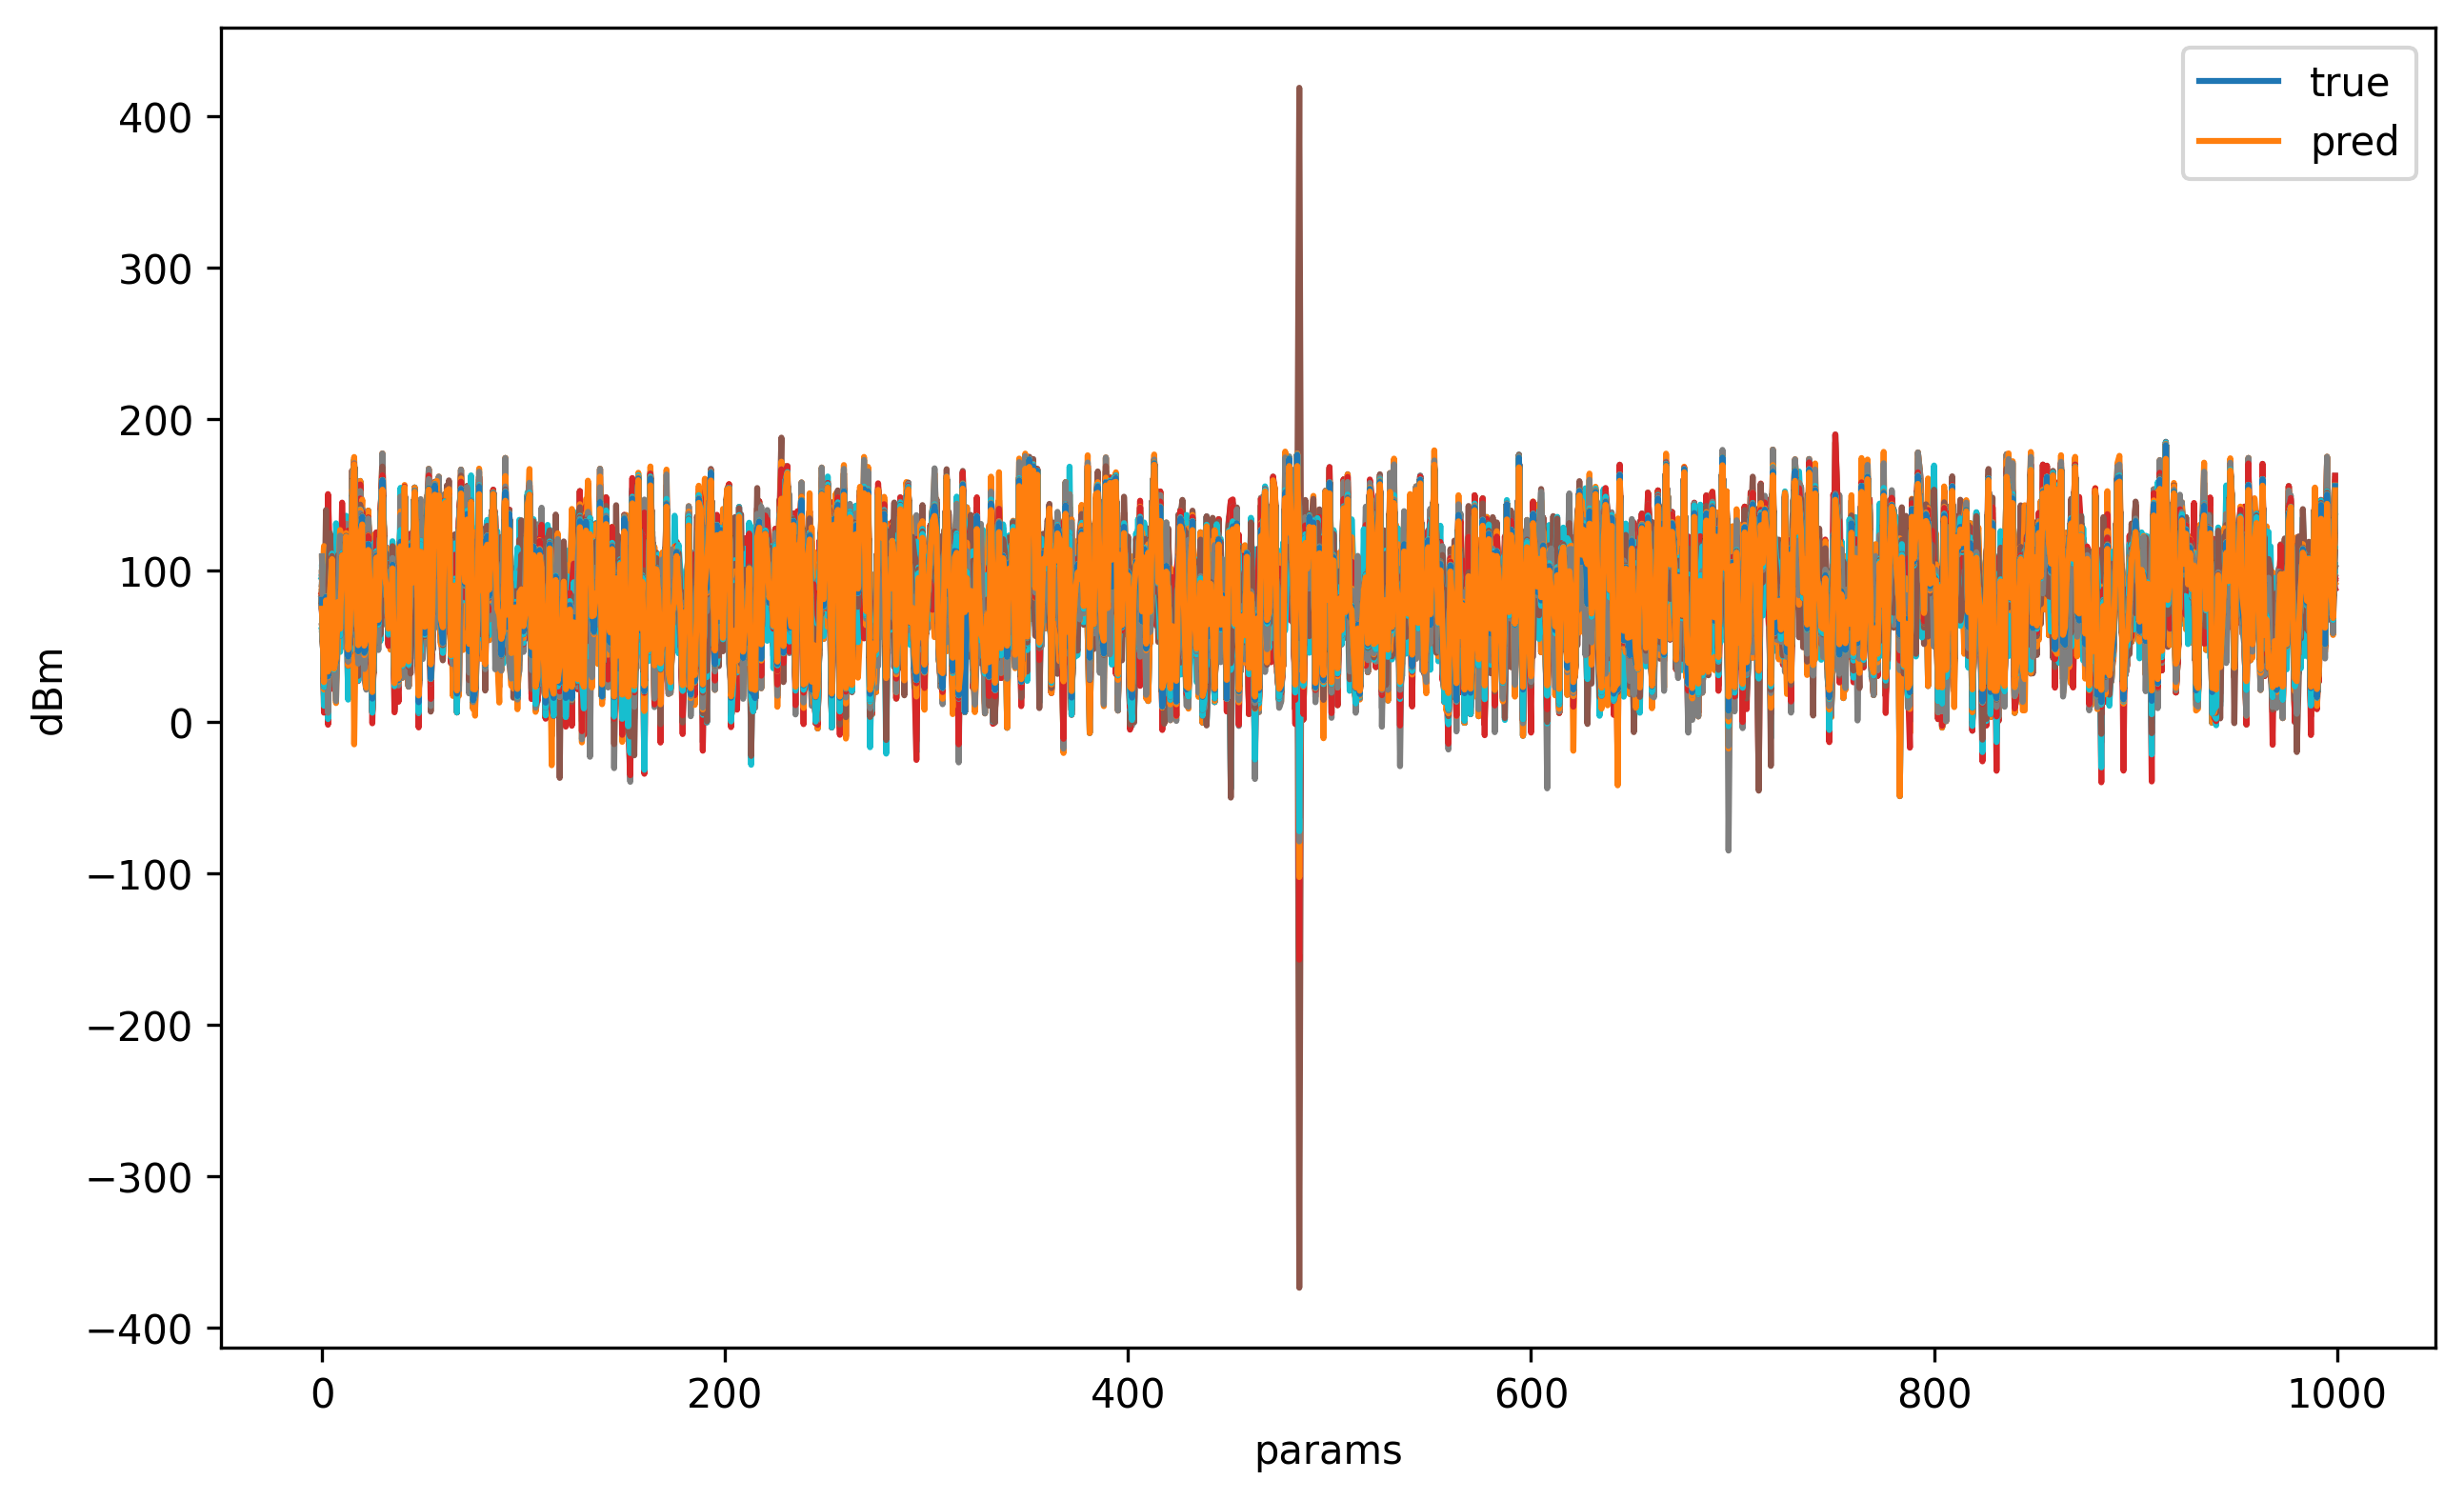

In [23]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['figure.dpi'] = 300


# Store the training and test losses for each grid size for later plotting.
tr_losses = []
te_losses = []
plot_grids = []
plot_steps = []
plot_lambs = []
tr_maes = []
tr_mses = []
tr_mapes = []
tr_r2s = []

train_losses = []
test_losses = []

# Thee parameters for the KAN model.
grids = np.array([5, 8, 10, 15, 20, 30, 40, 50])
steps = np.array([50, 100, 200, 300])
k = 3
lamb = np.array([0.002, 0.0002, 0.00002])

for g in range(grids.shape[0]):
    for s in range(steps.shape[0]):
        for l in range(lamb.shape[0]):
            model= KAN(
                width=[6,3,2,1],
                grid=grids[g], 
                k=3, 
                seed=42, 
                device=device, 
            ) 
            
            print(f"Grid size: {grids[g]}, steps {steps[s]}, {lamb[l]}")
            results = model.fit(dataset, opt="LBFGS", lamb=lamb[l], steps=steps[s], lamb_entropy=2.)
            
            train_losses += results['train_loss']
            test_losses += results['test_loss']
            #print(np.array(train_losses).mean())

            tr_mse, tr_rmse, tr_mae, tr_mape, tr_r2 = eval_kan(model, dataset);
            #te_mse, te_rmse, te_mae, te_mape, te_r2 = eval_kan(model, validation_data);

            plot_grids.append(grids[g])
            plot_steps.append(steps[s])
            plot_lambs.append(lamb[l])
            print(plot_lambs)
            
            tr_losses.append(np.array(train_losses).mean())
            te_losses.append(np.array(test_losses).mean())
            tr_maes.append(tr_mae)
            tr_mses.append(tr_mse)
            tr_mapes.append(tr_mape)
            tr_r2s.append(tr_r2)


In [ ]:
plot_gids_steps_lambda_loss(plot_grids, plot_steps, plot_lambs, tr_losses, "Train Loss")
plot_gids_steps_lambda_loss(plot_grids, plot_steps, plot_lambs, te_losses, 'Test Loss')
plot_gids_steps_lambda_loss(plot_grids, plot_steps, plot_lambs, tr_maes, 'MAE')
plot_gids_steps_lambda_loss(plot_grids, plot_steps, plot_lambs, tr_mses, 'MSE')
plot_gids_steps_lambda_loss(plot_grids, plot_steps, plot_lambs, tr_mapes, 'MAPE')
plot_gids_steps_lambda_loss(plot_grids, plot_steps, plot_lambs, tr_r2s, 'R2')

In [ ]:
# Plot the training and test losses.
plt.plot(train_losses)
plt.plot(test_losses)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')